1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


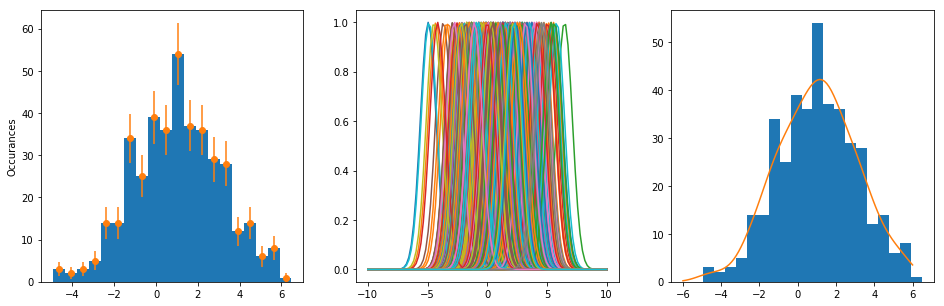

In [5]:
N=400
mean,std=1,2
import numpy as np;
X=np.random.normal(mean,std,N)

from matplotlib import pyplot as plt
fig=plt.figure(figsize=(16,5))

ax1=fig.add_subplot(1,3,1)
ax1.hist(X, bins=20)
ax1.set_ylabel('Occurances')

counts,bin_edges = np.histogram(X,20)
bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
ax1.errorbar(bin_centers,counts,yerr=np.sqrt(counts),fmt='o')
#ax1.show()

def gaussian(mu, sig):
  def val(x):
    return np.exp(-(x-mu)**2/(2*sig**2))
  return val;
std2=1.06*np.std(X)*np.power(X.size,-1/5)
gaussians=[gaussian(x,std2) for x in X]

ax2=fig.add_subplot(1,3,2)
for g in gaussians:
  supports=np.linspace(-10,10,100)
  ax2.plot(supports,[g(s) for s in supports])


ax3=fig.add_subplot(1,3,3)
gauss_int=np.sqrt(2*np.pi)*std2
norm_fac=(bin_edges[1]-bin_edges[0])/gauss_int;
xs=np.linspace(-6,6,100)
ys=[np.sum([g(x) for g in gaussians])*norm_fac for x in xs]
ax3.hist(X, bins=20)
ax3.plot(xs,ys)

plt.show()

In [6]:
gauss_int

1.6577655112305003

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

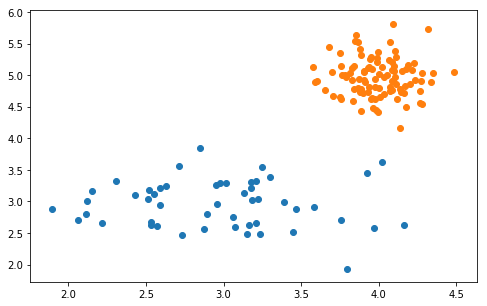

In [8]:
import numpy as np;

def genData(means,stds,N):
  return (np.random.normal(means[0],stds[0],N),np.random.normal(means[1],stds[1],N));
def genDataND(means,stds,Ns):
  return [genData(m,s,n) for m,s,n in zip(means,stds,Ns)]

pairsOfCoords=genDataND(((3,3),(4,5)),((0.5,0.4),(0.2,0.3)),(50,100))

from matplotlib import pyplot as plt
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
for xs,ys in pairsOfCoords:
  ax.scatter(xs, ys)
plt.show()

In [0]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [0]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

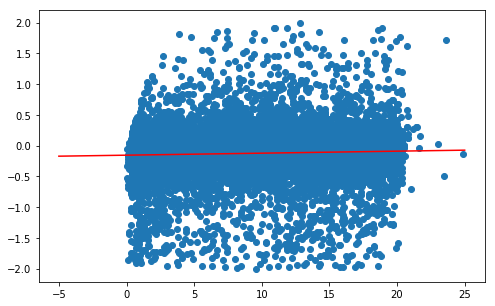

In [35]:
import pandas as pd
df=pd.DataFrame().from_dict(np.load('residuals_261.npy',allow_pickle=True).item())
df=df[abs(df['residuals'])<2]

[ys,xs]=df.values.transpose()
import scipy as sp
from scipy import stats
slope,intercept=sp.stats.linregress(xs,ys)[0:2]

from matplotlib import pyplot as plt
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
ax.scatter(xs, ys)
supports=np.linspace(-5,25,10)
sp=ax.plot(supports,[intercept+slope*x for x in supports],'r')
plt.show()

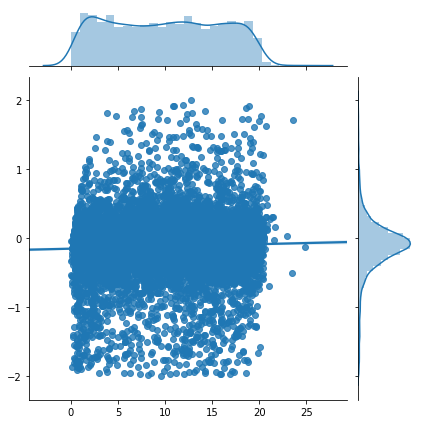

In [25]:
import seaborn as sb
sb.jointplot(xs,ys,kind='reg')

In [0]:
import numpy as np
x=np.linspace(0,20,5)
edges=[-99999]+list((x[:-1]+x[1:])/2)+[99999]
data = df.values
y=[np.array([d[0] for d in data if edges[i]<=d[1]<edges[i+1]]).mean() for i in range(0,len(edges)-1)]
erry=[np.array([d[0] for d in data if edges[i]<=d[1]<edges[i+1]]).std() for i in range(0,len(edges)-1)]

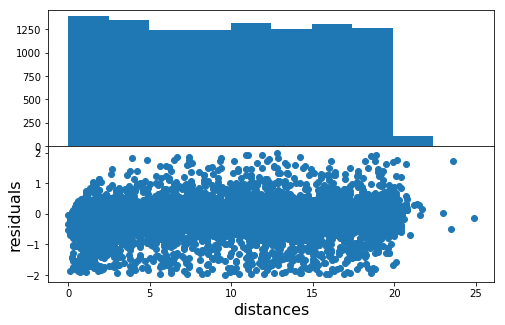

In [50]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(8,5))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
plt.subplots_adjust(wspace=0, hspace=0)

ax1.hist(xs)
ax2.set_ylabel("residuals", fontsize = 16)
ax2.set_xlabel("distances", fontsize = 16)
ax2.scatter(xs, ys)
plt.show()